# Mask R-CNN (Mask Region Based Convolutional neural Networks) Tipvortexkavitationannotationen visualisieren

In [110]:
import os 
import sys
import random
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.patches as patches 

Pfad = os.path.abspath("D:/Bachelor-Arbeit-Daten/MaskRCNNProjekt/MaskRCNN_2/Mask_RCNN")

sys.path.append(Pfad)

from mrcnn import utils 
from mrcnn import visualize 
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log 

from samples.Tipvortexcavitation import Tipvortexcavitation

%matplotlib inline

In [111]:
konfig = Tipvortexcavitation.TipvortexcavitationConfig()
Tvc_DIR = os.path.join(Pfad, "datasets/Tipvortexcavitation") 


In [112]:
datasatz = Tipvortexcavitation.TipvortexcavitationDataset() 
datasatz.load_Tipvortexcavitation(Tvc_DIR, "train")

datasatz.prepare()
print("Image Count: {}".format(len(datasatz.image_ids)))
print("Class Count: {}".format(datasatz.num_classes))

for i, info in enumerate(datasatz.class_info):
    print("{:3}. {:50}".format(i, info['name']))



Image Count: 22
Class Count: 2
  0. BG                                                
  1. Tipvortexcavitation                               


In dieser Zelle werden die Bilder und die annotierte Bilder ausgegeben 

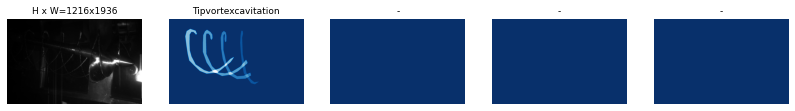

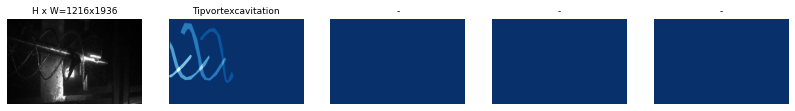

In [113]:
image_ids = np.random.choice(datasatz.image_ids, 2)
for image_id in image_ids:
    image = datasatz.load_image(image_id)
    mask, class_ids = datasatz.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, datasatz.class_names)


In [114]:
image_ids

array([10, 11])

image_id  7 D:\Bachelor-Arbeit-Daten\MaskRCNNProjekt\MaskRCNN_2\Mask_RCNN\datasets/Tipvortexcavitation\train\Neue Videos_0000000003_2021_11_17_15_38_57_578_2021_11_17_14_38_57_560_224966064811_289406.png
image                    shape: (1216, 1936, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1216, 1936, 3)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (3,)                  min:    1.00000  max:    1.00000  int32
box                      shape: (3, 4)                min:    4.00000  max:  920.00000  int32


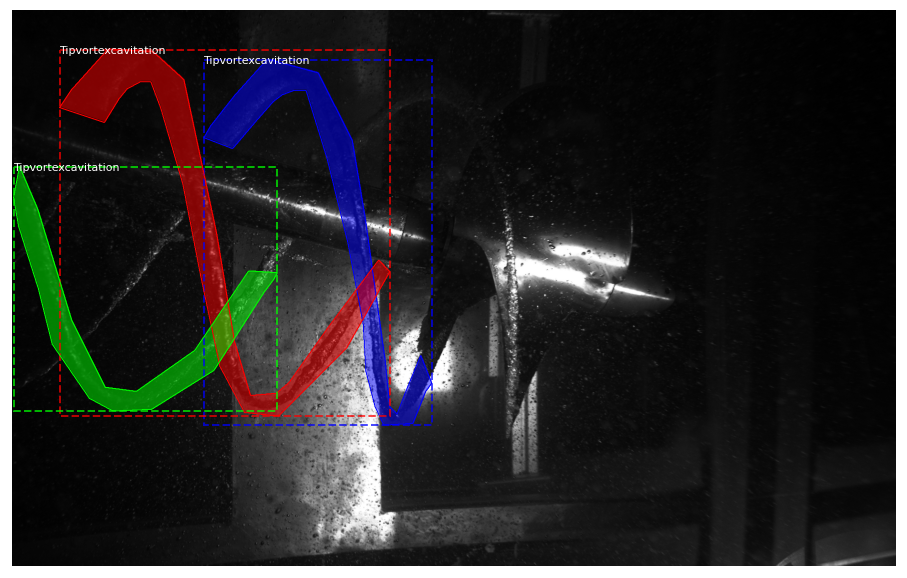

In [115]:
image_id = random.choice(datasatz.image_ids)
image = datasatz.load_image(image_id)
mask, class_ids = datasatz.load_mask(image_id)

bbox = utils.extract_bboxes(mask)

print("image_id ", image_id, datasatz.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("box", bbox)

visualize.display_instances(image, bbox, mask, class_ids, datasatz.class_names)

image_id:  1 D:\Bachelor-Arbeit-Daten\MaskRCNNProjekt\MaskRCNN_2\Mask_RCNN\datasets/Tipvortexcavitation\train\Neue Videos_0000000000_2021_11_17_15_38_57_375_2021_11_17_14_38_57_360_224964063417_289402.png
Original shape:  (1216, 1936, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (4,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (4, 4)                min:    0.00000  max:  671.00000  int32


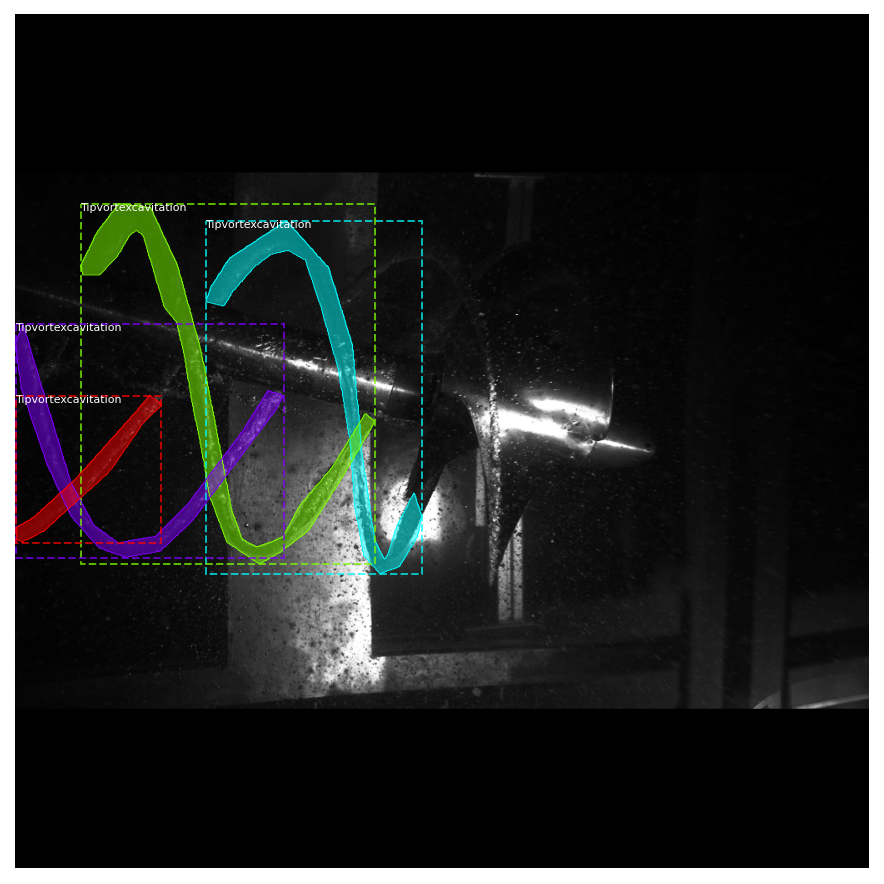

In [116]:
image_id = np.random.choice(datasatz.image_ids, 1)[0]
image = datasatz.load_image(image_id)
mask, class_ids = datasatz.load_mask(image_id)
original_shape = image.shape

image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=konfig.IMAGE_MIN_DIM,
    max_dim=konfig.IMAGE_MAX_DIM,
    mode=konfig.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask,scale,padding)

bbox = utils.extract_bboxes(mask)

print("image_id: ", image_id, datasatz.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

visualize.display_instances(image, bbox, mask, class_ids,datasatz.class_names)

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1936.00000  float64
class_ids                shape: (4,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (4, 4)                min:    1.00000  max:  668.00000  int32
mask                     shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  bool


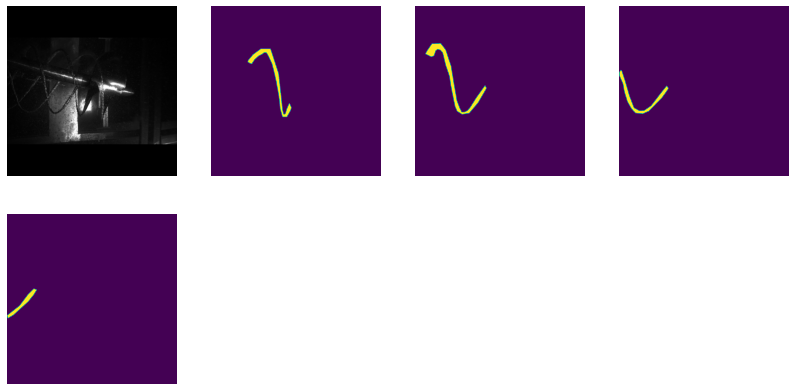

In [117]:
image_id = np.random.choice(datasatz.image_ids,1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    datasatz, konfig, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox",bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1],7))])

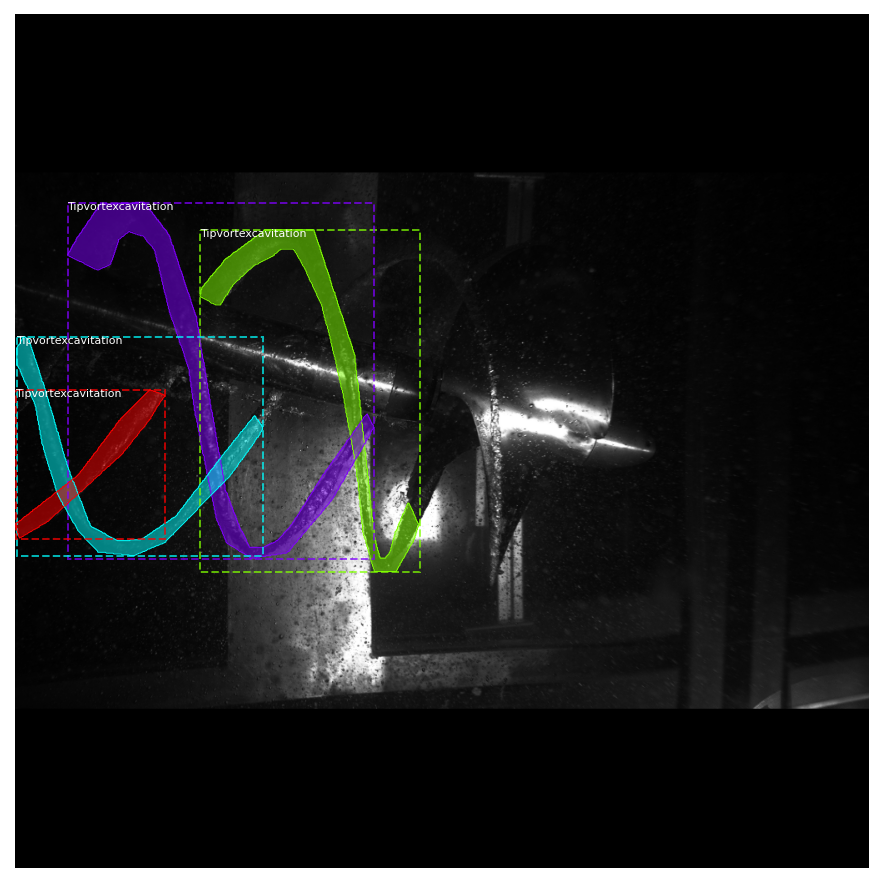

In [118]:
visualize.display_instances(image, bbox, mask, class_ids,datasatz.class_names)

C:\Users\majd4\anaconda3\envs\Matterprot_MaskRCNN\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


mask                     shape: (56, 56, 4)           min:    0.00000  max:    1.00000  bool


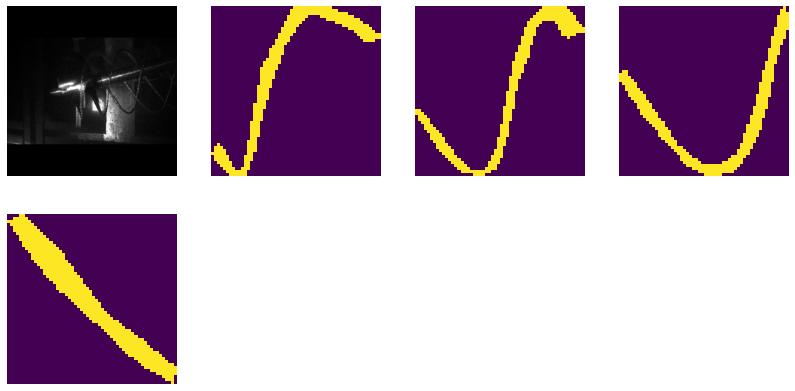

In [119]:
image, image_meta, class_ids,bbox, mask = modellib.load_image_gt(
datasatz, konfig, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

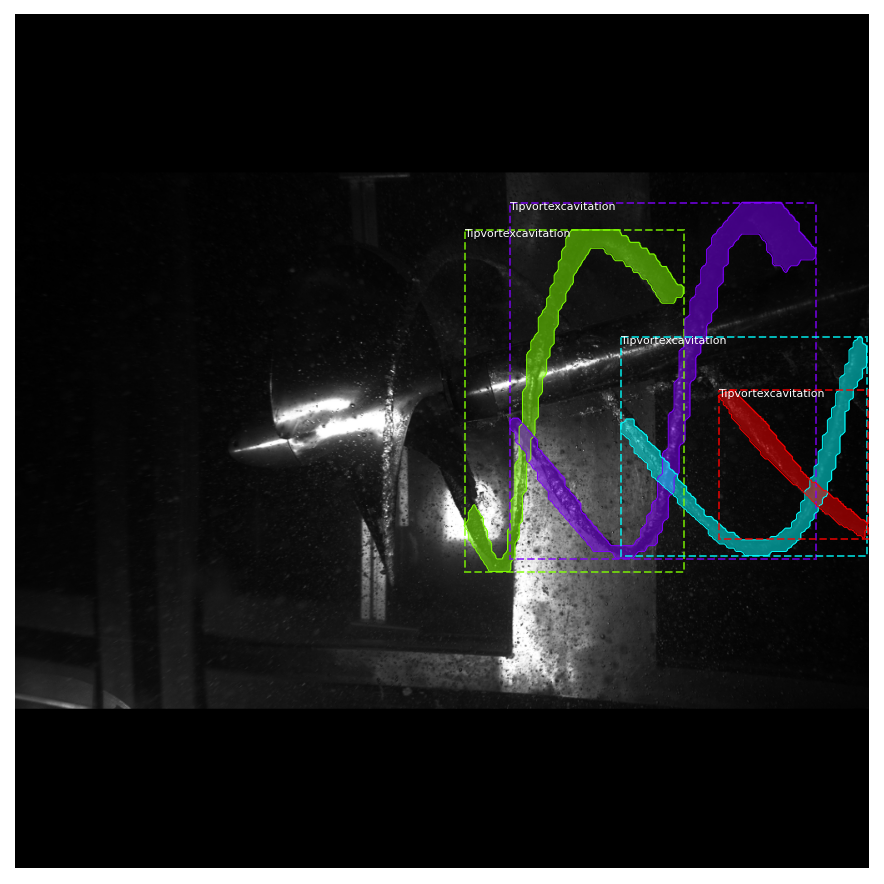

In [120]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids,datasatz.class_names)

Anker(Anchors)